In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [4]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15   Latitude   86 non-null     int64 
 16   Longitude  86 non-null     int64 
 17  Region      86 non-null     object
dtypes: int64(15), object(3)
memory usage: 12.2+ KB


In [6]:
flavours = whisky.iloc[:, 2:14]
flavours.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


In [7]:
corr_flavours = pd.DataFrame.corr(flavours)
print(corr_flavours)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

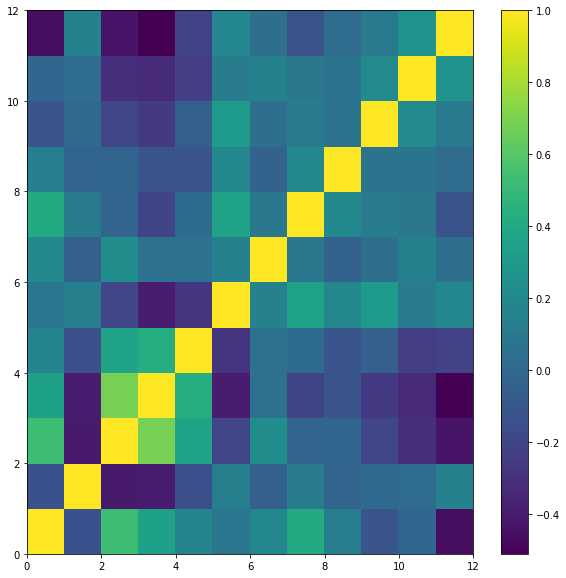

In [10]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavours)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

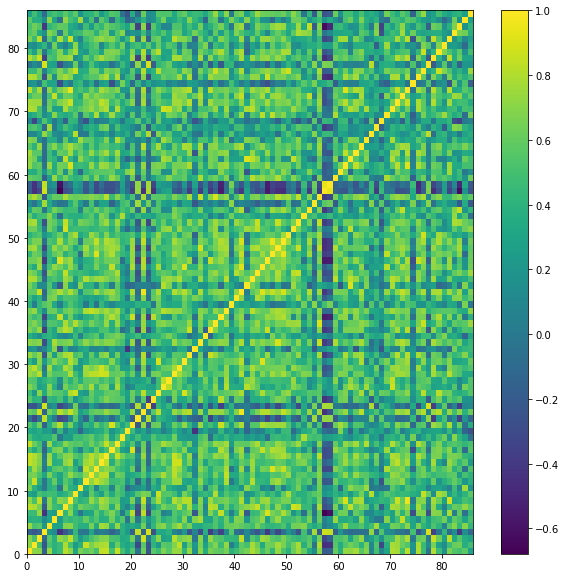

In [11]:
corr_whisky = pd.DataFrame.corr(flavours.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.savefig("corr_whisky.pdf")

In [12]:
from sklearn.cluster.bicluster import SpectralCoclustering

/home/amm22/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
model = SpectralCoclustering(n_clusters=6, random_state=6)
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=6)

In [14]:
model.rows_

array([[False, False,  True, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True, False,  True,  True, False,
        False,  True, False,  True, False, False, False, False, False,
        False,  True, False, False, False,  True, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False,  True, False,
         True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

Each row in this array identifies a cluster, here ranging from 0 to 5. Each column identifies a row in the correlation matrix, here ranging from 0 to 86.

If we sum all of the comuns of this array, we can find out how many observations belong to each cluster.

In [15]:
np.sum(model.rows_, axis=1)

array([17,  5, 21, 21,  6, 16])

i.e: 6 whiskeys belong to cluster nº4

If instead we sum all of the rows, we can find out how many clusters belong to each observation. Because each observation belongs in just one of the six clusters, the answer will be 1 for all of them.

In [16]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
#row labels of the model
model.row_labels_

array([5, 2, 0, 4, 5, 3, 0, 2, 5, 0, 2, 3, 5, 3, 5, 5, 3, 2, 3, 1, 0, 4,
       0, 4, 0, 0, 2, 2, 0, 2, 0, 5, 3, 3, 3, 5, 2, 0, 3, 1, 3, 0, 2, 2,
       2, 3, 5, 3, 3, 0, 0, 2, 2, 2, 3, 1, 2, 4, 4, 3, 0, 5, 2, 5, 5, 2,
       1, 2, 1, 3, 2, 5, 3, 5, 2, 5, 0, 4, 5, 0, 3, 0, 3, 3, 2, 3],
      dtype=int32)

i.e: observation number 0 belongs to cluster 5, and so on.

In [18]:
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,5
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,2
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,0
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,4
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,5


In [20]:
whisky = whisky.loc[np.argsort(model.row_labels_)]
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
24,25,Craigallechie,2,2,2,0,1,2,2,1,2,2,1,4,AB38 9ST,328920,844920,Speyside,0
41,42,Glenallachie,1,3,1,0,0,1,1,0,1,2,2,2,AB38 9LR,326490,841240,Speyside,0
37,38,GlenMoray,1,2,1,0,0,1,2,1,2,2,2,4,IV30 1YE,319820,862320,Speyside,0
60,61,Loch Lomond,1,1,1,1,0,1,1,0,1,2,1,2,G83 0TL,239370,680920,Highlands,0
30,31,Dufftown,2,3,1,1,0,0,0,0,1,2,2,2,AB55 4BR,332360,839200,Speyside,0


In [21]:
whisky = whisky.reset_index(drop=True)
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,25,Craigallechie,2,2,2,0,1,2,2,1,2,2,1,4,AB38 9ST,328920,844920,Speyside,0
1,42,Glenallachie,1,3,1,0,0,1,1,0,1,2,2,2,AB38 9LR,326490,841240,Speyside,0
2,38,GlenMoray,1,2,1,0,0,1,2,1,2,2,2,4,IV30 1YE,319820,862320,Speyside,0
3,61,Loch Lomond,1,1,1,1,0,1,1,0,1,2,1,2,G83 0TL,239370,680920,Highlands,0
4,31,Dufftown,2,3,1,1,0,0,0,0,1,2,2,2,AB55 4BR,332360,839200,Speyside,0


In [23]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

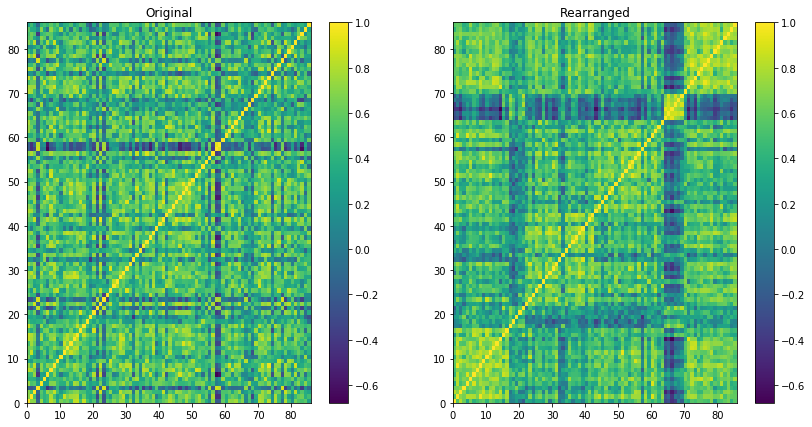

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.colorbar()
plt.subplot(122)
plt.pcolor(correlations)
plt.title('Rearranged')
plt.colorbar()
plt.savefig("corr_whisky.pdf")

**Left:**
Correlation matrix of the 86 whiskies computed over their flavor profiles.

**Right:**
Same correlation matrix except its rows and columns have been reordered using spectral co-clustering method. It was settled to identify six different groups of whiskies, which can be seen by following the diagonal, each cluster is represented as a square. It is expected that whiskeys belonging to the same block to be similar in their flavor, smokiness, honey flavor, and so on.

In [32]:
whisky = pd.read_csv("whiskies.csv", index_col=0)
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

In [33]:
correlations.shape

(86, 86)

In [34]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.
from bokeh.models import HoverTool, ColumnDataSource

# Let's plot a simple 5x5 grid of squares, alternating between two colors.
plot_values = [1,2,3,4,5]
plot_colors = ['#0173b2', '#de8f05']

from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [35]:
# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)


In [36]:
# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

['#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2']


In [37]:
# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data = {
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)

from bokeh.plotting import figure, output_file, show

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="hover")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

In [30]:
cluster_colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161']
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = {}
for i in range(len(regions)):
    region_colors[regions[i]]= [cluster_colors[i]]
    
region_colors

{'Speyside': ['#0173b2'],
 'Highlands': ['#de8f05'],
 'Lowlands': ['#029e73'],
 'Islands': ['#d55e00'],
 'Campbelltown': ['#cc78bc'],
 'Islay': ['#ca9161']}

In [39]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i,j] < 0.7 :                      # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if (correlations[i,j] > 0.7 and whisky.Group[i] == whisky.Group[j]):       # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

In [40]:
correlation_colors[:5]

['#0173b2', 'white', 'white', 'white', 'white']

In [41]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "correlations": correlations.flatten(),
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", x_range=list(reversed(distilleries)), y_range=distilleries,
    tools="hover,box_zoom,reset")
fig.plot_width  = 700
fig.plot_height = 700
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source, color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

In [45]:
def location_plot(title, region_cols):

    output_file(title+".html")
    location_source = ColumnDataSource(
        data = {
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title = title,
        x_axis_location = "above", tools="hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle("x", "y", size=9, source=location_source, color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)


#region_cols = [region_colors[i] for i in list(whisky["Region"])]    
region_cols = list(region_colors.values())
location_plot("Whisky Locations and Regions", region_cols)

In [46]:
region_cols = [region_colors[i] for i in list(whisky["Region"])]
classification_cols = [cluster_colors[i] for i in list(whisky["Group"])]

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)